# Analyze person image with ToolUse or not
- [Tool use API examples](https://docs.aws.amazon.com/bedrock/latest/userguide/tool-use-examples.html)

## 1. 환경 세팅

In [1]:
# is_needed_install = True
is_needed_install = False

if is_needed_install:
    # ! pip install -U boto3 langchain_aws anthropic
    ! pip install -U boto3 

In [2]:
%load_ext autoreload
%autoreload 2

from utils_bedrock_skin_gender import *

## 2. 이미지 지정

In [3]:
prepped_images = "skin_gender_img/asia_man.jpeg"
# prepped_images = "skin_gender_img/black_man.png"
# prepped_images = "skin_gender_img/white_woman.png"



## 3. 프롬프트 및 Tool 세팅

In [4]:
from textwrap import dedent

prompt_no_tooluse = dedent(
    """
    나만의 이미지 생성 프롬프트 만들어줘
    """
)

prompt_tooluse = dedent(
    """
    나만의 이미지 생성 프롬프트 만들어줘
    """
)


# model_id ="anthropic.claude-3-5-sonnet-20240620-v1:0"
model_id = "anthropic.claude-3-5-sonnet-20241022-v2:0"

tool_config = {
"tools": [
    {
        "toolSpec": {
            "name": "create_my_image_prompt",
            "description": "이미지를 분석해서 얼굴색 및 성별을 알아내고, 얼굴색 및 성별에 맞는 중세시대 기사의 영웅적인 자화상을 만드는 이미지 생성 프롬프트를 만드는 툴 입니다",
            "inputSchema": {
                "json": {
                    "type": "object",
                    "properties": {
                        "image_prompt_en": {
                            "type": "string",
                            "description": "Generate a heroic medieval knight image prompt using the given gender and skin tone from the reference image"
                        },
                        "image_prompt_kr": {
                            "type": "string",
                            "description": "주어진 이미지의 성별, 피부색을 사용해서 중세시대 기사의 영웅적인 이미지 생성 프롬프트"
                        },
                        "gender": {
                            "type": "string",
                            "description": "성별을 알려줘"
                        },
                        "skin_color": {
                            "type": "string",
                            "description": "피부색을 알려줘"
                        },

                    },
                    "required": [
                        "image_prompt_en",
                        "image_prompt_kr",
                        "gender",                        
                        "skin_color",
                    ]
                }
            }
        }
    }
]
}

# inference config
inference_config = {
    "maxTokens": 4096,
    "temperature": 0,
    "topP": 0.1,
    "stopSequences": ["\n\nHuman:", "\n\nToolUse:"]
}

bedrock_client = boto3.client(service_name='bedrock-runtime')




## 4. ToolUse 없이 Claude 에서 이미지 전달하여, Prommt 에 반응

In [5]:
try:
    isToollUse = False
    messages = generate_text(bedrock_client, model_id, tool_config, 
                            prompt_no_tooluse, 
                            prepped_images,
                            inference_config,
                            # tools=isToollUse,
                            tools=isToollUse,   
                            verbose=False,                         
                            )


except ClientError as err:
    messages = err.response['Error']['Message']
    print("A client error occurred: %s", message)
    print(f"A client error occured: {message}")

if isToollUse:
    parse_korean_comments_tools(messages)
else:
    parse_korean_comments(messages)


## Generating text with model %s anthropic.claude-3-5-sonnet-20241022-v2:0
ToolUse is NOT used
이 이미지를 바탕으로 다음과 같은 프롬프트를 제안드립니다:.
"Professional headshot portrait, black background, soft natural lighting, wearing light grey casual sweater, warm genuine smile, clean minimalist style, sharp focus on subject, studio photography, high contrast, professional corporate look, Asian features, short black hair, natural skin texture, head and shoulders composition".
이 프롬프트는 다음과 같은 주요 요소들을 포함하고 있습니다:.
- 전문적인 헤드샷 스타일.
- 깔끔한 검은 배경.
- 자연스러운 조명.
- 캐주얼하면서도 프로페셔널한 의상.
- 따뜻한 표정.
- 미니멀한 구도.
- 선명한 초점.
- 높은 대비.
이러한 요소들을 조합하면 보여주신 이미지와 유사한 분위기의 프로페셔널한 포트레이트를 생성할 수 있습니다.


## 5. Claude 에서 이미지 전달하고, ToolUse 를 이용하여 Prommt 에 반응

In [6]:
try:
    isToollUse = True

    messages = generate_text(bedrock_client, model_id, tool_config, 
                            prompt_tooluse, 
                            prepped_images,
                            inference_config,
                            tools=isToollUse,   
                            # verbose=False,                         
                            verbose=True,                                                     
                            )


except ClientError as err:
    messages = err.response['Error']['Message']
    print("A client error occurred: %s", messages)
    print(f"A client error occured: {messages}")



## Generating text with model %s anthropic.claude-3-5-sonnet-20241022-v2:0
ToolUse is used


##response: after the first converse() with the query and tool_config 
{
  "ResponseMetadata": {
    "RequestId": "7ee02558-4594-4fe6-b1df-57ad388037f3",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Wed, 06 Nov 2024 12:24:58 GMT",
      "content-type": "application/json",
      "content-length": "1232",
      "connection": "keep-alive",
      "x-amzn-requestid": "7ee02558-4594-4fe6-b1df-57ad388037f3"
    },
    "RetryAttempts": 0
  },
  "output": {
    "message": {
      "role": "assistant",
      "content": [
        {
          "text": "이미지를 분석해보니 동양인 남성의 얼굴이 보입니다. 이 특징을 바탕으로 중세시대 기사의 영웅적인 이미지 프롬프트를 생성해드리겠습니다."
        },
        {
          "toolUse": {
            "toolUseId": "tooluse_gGQPsI5zRDmBOXZFMjmVAg",
            "name": "create_my_image_prompt",
            "input": {
              "gender": "male",
              "skin_color": "asian",
              "image_prompt_en": "A noble Asian male knight in gleaming silver armor, standing proudly in a medieval cas

### 파싱해서 결과 보기

In [7]:
if isToollUse:
    image_prompt_en, image_prompt_kr, gender, skin_coler = parse_korean_comments_tools(messages)
else:
    parse_korean_comments(messages)


##################################################
## Response directly from LLM
##################################################
text from LLM:
이미지를 분석해보니 동양인 남성의 얼굴이 보입니다. 이 특징을 바탕으로 중세시대 기사의 영웅적인 이미지 프롬프트를 생성해드리겠습니다.
##################################################
## Response from ToolUse
##################################################
Describe image in en :
A noble Asian male knight in gleaming silver armor, standing proudly in a medieval castle courtyard.
His face shows determination and wisdom, wearing an ornate helmet with dragon motifs.
The armor is decorated with intricate Eastern-inspired patterns.
Dramatic lighting emphasizes his heroic pose as he holds a legendary sword.
Describe image in kr :
웅장한 성채 안뜰에 서 있는 고귀한 동양인 기사의 모습.
빛나는 은빛 갑옷을 입고 있으며, 용 문양이 새겨진 화려한 투구를 쓰고 있다.
갑옷에는 동양적인 문양이 정교하게 새겨져 있다.
전설의 검을 들고 있는 영웅적인 자세가 극적인 조명과 함께 강조되어 있다.
Gender: male
Skin color: asian


## 6. 이미지 생성

### 원본 이미지

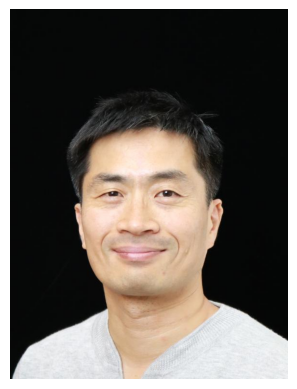

In [8]:
show_image(prepped_images)

### 이미지 생성 프롬프트에 따라 생성된 이미지

Image saved as 'generated_image.png'


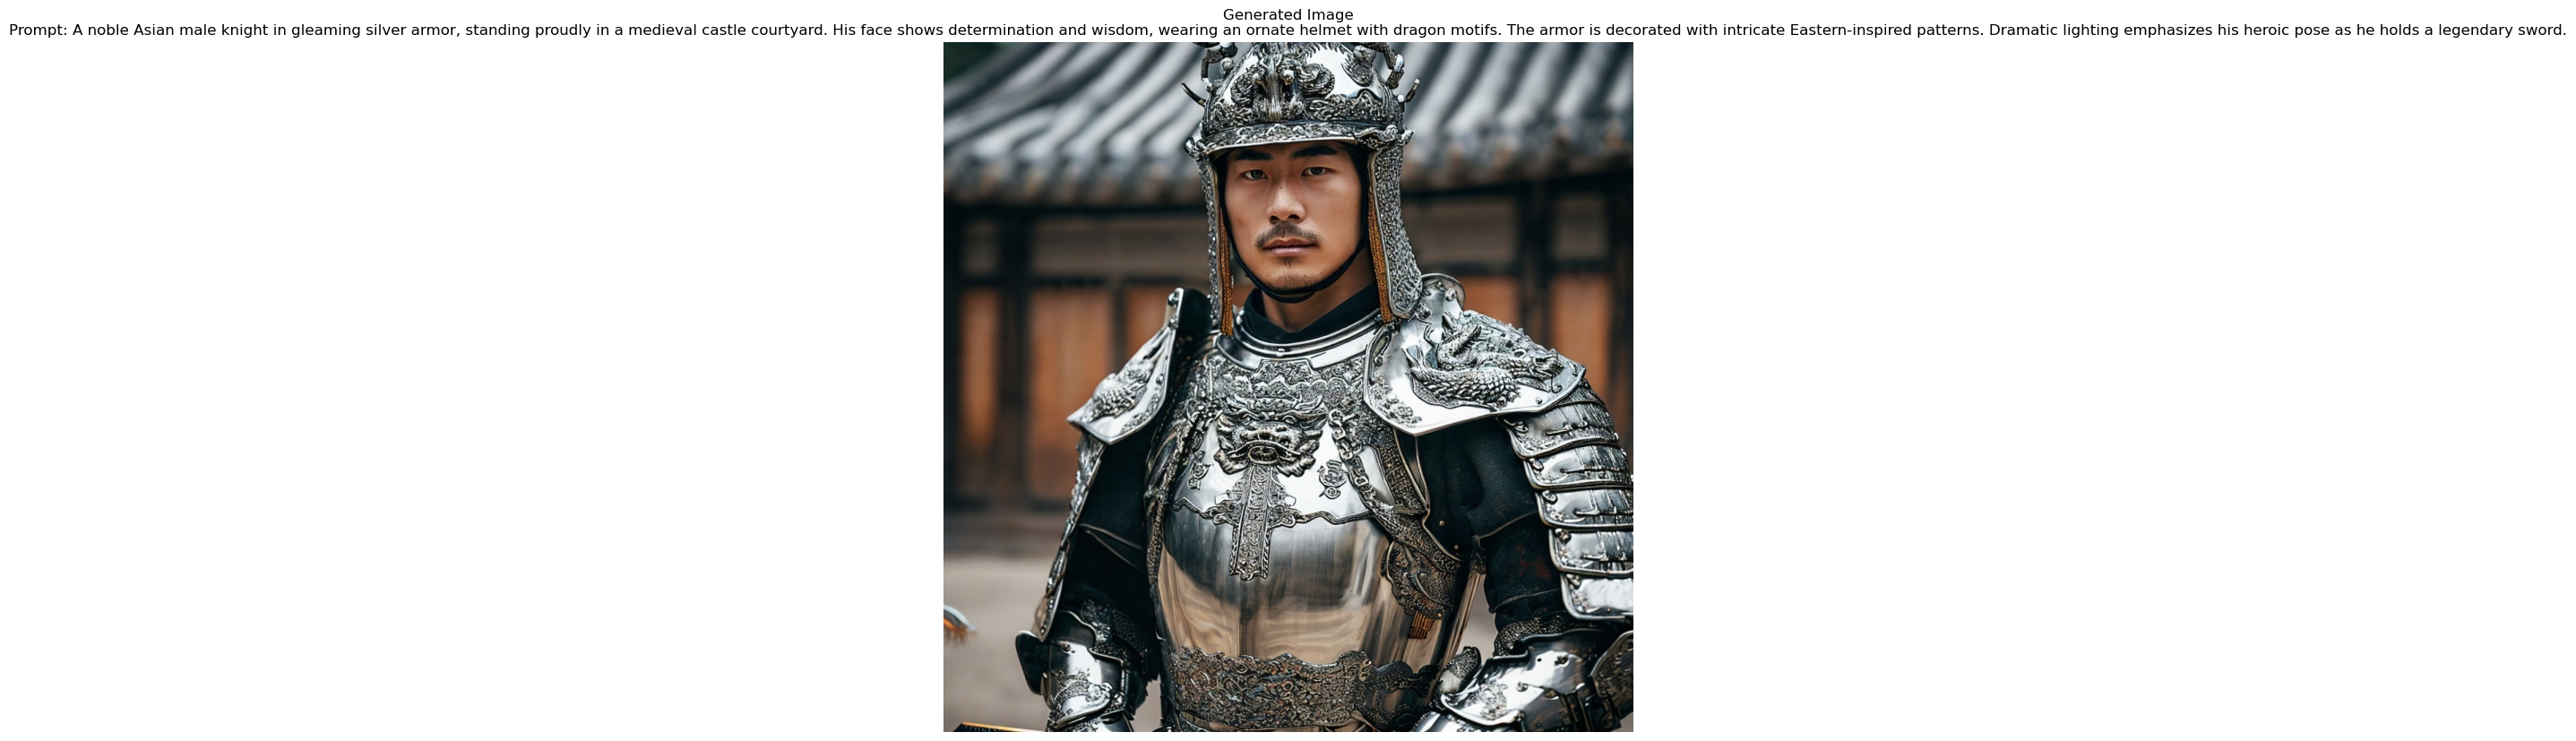

Image saved as 'result_image/generated_image.png'


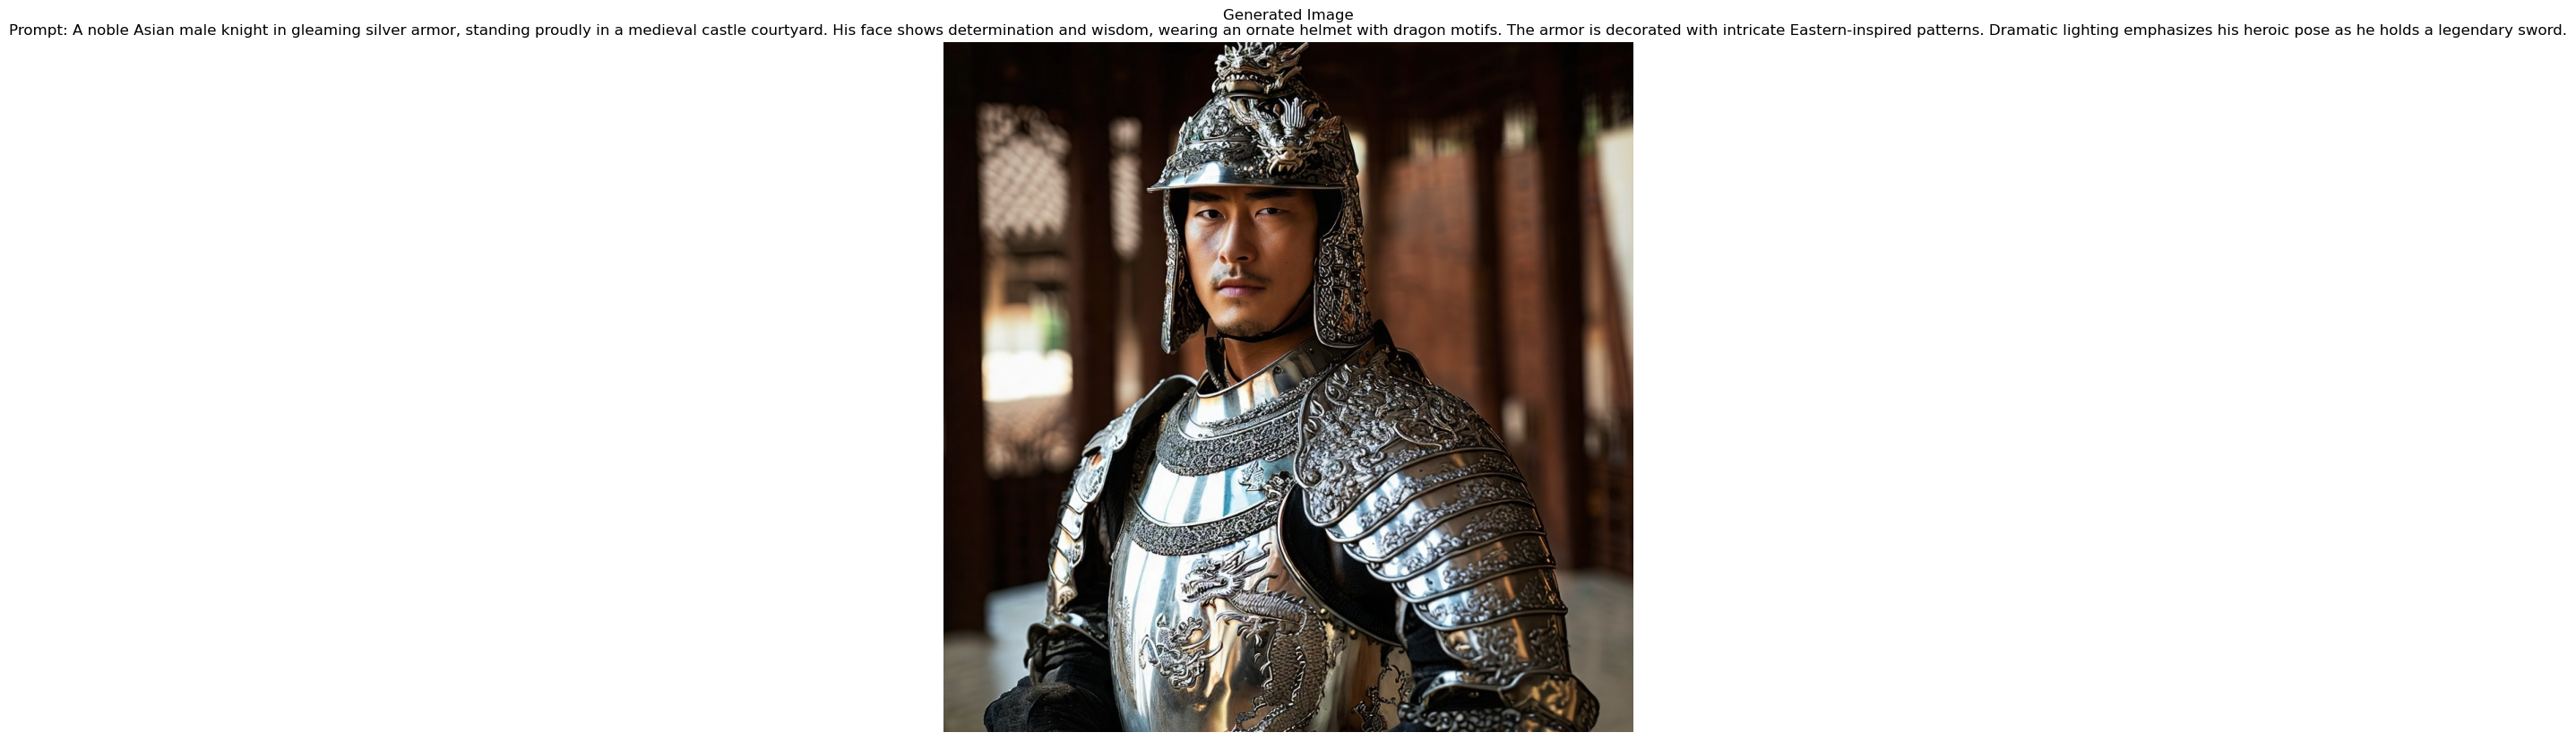

In [9]:
# 사용 예시
generated_image = generate_and_show_image(image_prompt_en)
save_image = "result_image/generated_image.png"
generate_and_show_image(image_prompt_en, save_path=save_image)


        

